*Mantas Valiulis\
Lab. darbas Nr. 1, I dalis*

# Pagrindinė dalis

**Darbe naudojamas 'esoph' duomenų rinkinys, kurame yra duomenys apie rūkymo, alkoholio vartojimo ir stemplės vėžio riziką. Duomenys yra suskirstyti į grupes pagal amžių, suvartojamo tabako ir alkoholio kiekį.**

In [3]:
data(esoph)
head(esoph)
tail(esoph)

agegp,alcgp,tobgp,ncases,ncontrols
25-34,0-39g/day,0-9g/day,0,40
25-34,0-39g/day,10-19,0,10
25-34,0-39g/day,20-29,0,6
25-34,0-39g/day,30+,0,5
25-34,40-79,0-9g/day,0,27
25-34,40-79,10-19,0,7


,agegp,alcgp,tobgp,ncases,ncontrols
83,75+,40-79,20-29,0,3
84,75+,40-79,30+,1,1
85,75+,80-119,0-9g/day,1,1
86,75+,80-119,10-19,1,1
87,75+,120+,0-9g/day,2,2
88,75+,120+,10-19,1,1


**Amžiaus,suvartojomo alkoholio ir tobako kiekio kategorijos paverčiamos skaitinėmis vertėmis, kad būtų galima skaičiuoti koreliaciją tarp jų.
Pridedamas papildomas stulpelis, kuris paskaičiuoja procentinį vėžio atvejų santykį kiekvienai grupei.**

In [4]:
df <- esoph

df$agegp <- ifelse(df$agegp == "25-34", 30,
                         ifelse(df$agegp == "35-44", 40,
                         ifelse(df$agegp == "45-54", 50,
                         ifelse(df$agegp == "55-64", 60,
                         ifelse(df$agegp == "65-74", 70,
                         ifelse(df$agegp == "75+", 80, NA))))))

df$alcgp <- ifelse(df$alcgp == "0-39g/day", 20,
                        ifelse(df$alcgp == "40-79", 60,
                        ifelse(df$alcgp == "80-119", 100,
                        ifelse(df$alcgp == "120+", 120, NA))))

df$tobgp <- ifelse(df$tobgp == "0-9g/day", 5,
                        ifelse(df$tobgp == "10-19", 15,
                        ifelse(df$tobgp == "20-29", 25,
                        ifelse(df$tobgp == "30+", 30, NA))))

df$cases_ratio  <- df$ncases * 100 / (df$ncontrols + df$ncases)

**Sukuriama koreliacijos matrica tarp agegp, alcgp, tobgp ir cases_ratio stulpelių.**

In [5]:
cor_matrix <- cor(df[, -c(4, 5)])
cor_matrix

,agegp,alcgp,tobgp,cases_ratio
agegp,1.00000000,-0.01367027,-0.06877864,0.58703223
alcgp,-0.01367027,1.00000000,-0.04568395,0.50665129
tobgp,-0.06877864,-0.04568395,1.00000000,0.05070901
cases_ratio,0.58703223,0.50665129,0.05070901,1.00000000


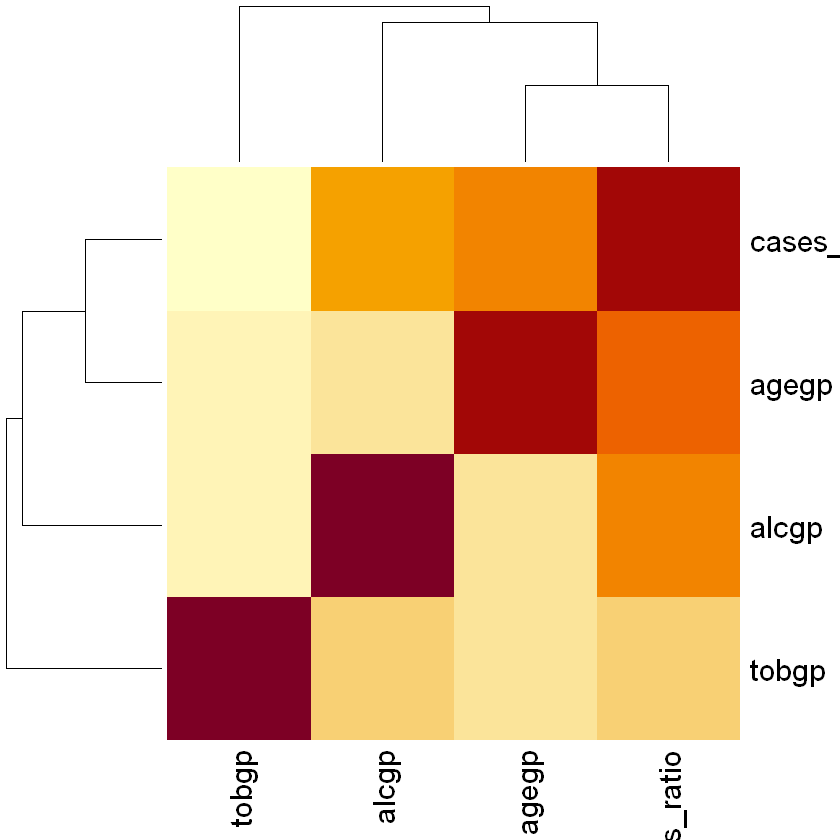

In [6]:
heatmap(cor_matrix)

**Toliau naudojamas pradinis duomenų rinkinys su pridėtu vėžio susirgimų santykiu.**

In [7]:
df2 <- esoph
df2$cases_ratio  <- df2$ncases * 100 / (df2$ncontrols + df2$ncases)

**Žemiau esančios stulpelinės diagramos vaizduoja vidutinį vėžio atvejų santykį, kiekvienai kategorijai: suvartojamo alkoholio kiekio, suvartojamo tobako kiekio, amžiaus.**

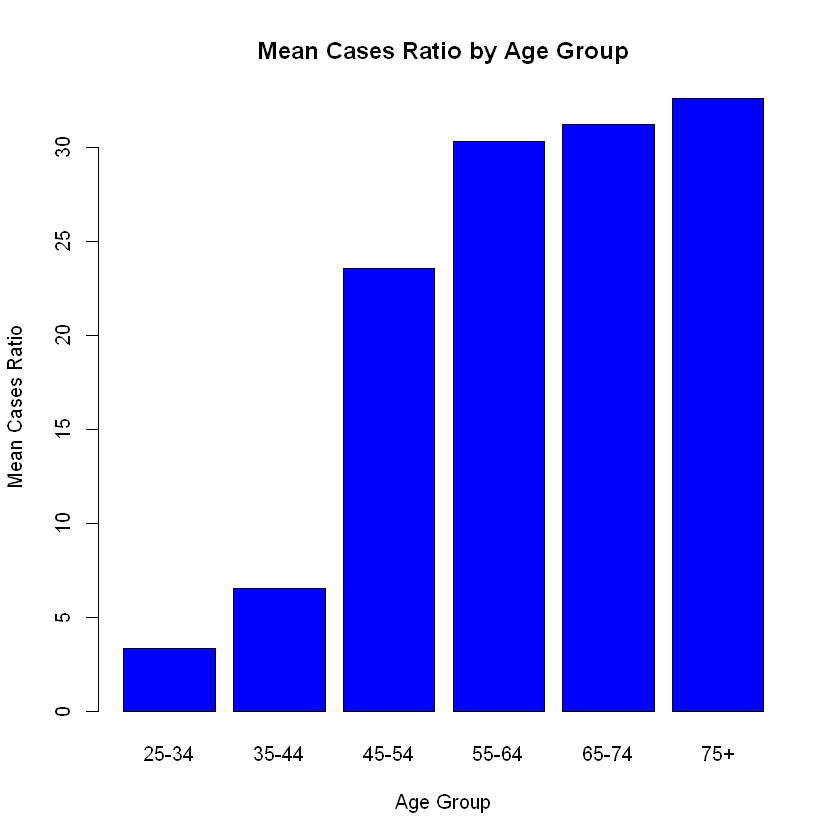

In [8]:
mean_cases_ratio_by_agegp <- aggregate(cases_ratio ~ agegp, data = df2, FUN = mean)

barplot(mean_cases_ratio_by_agegp$cases_ratio, 
        names.arg = mean_cases_ratio_by_agegp$agegp, 
        main = "Mean Cases Ratio by Age Group",
        xlab = "Age Group",
        ylab = "Mean Cases Ratio",
        col = "blue")

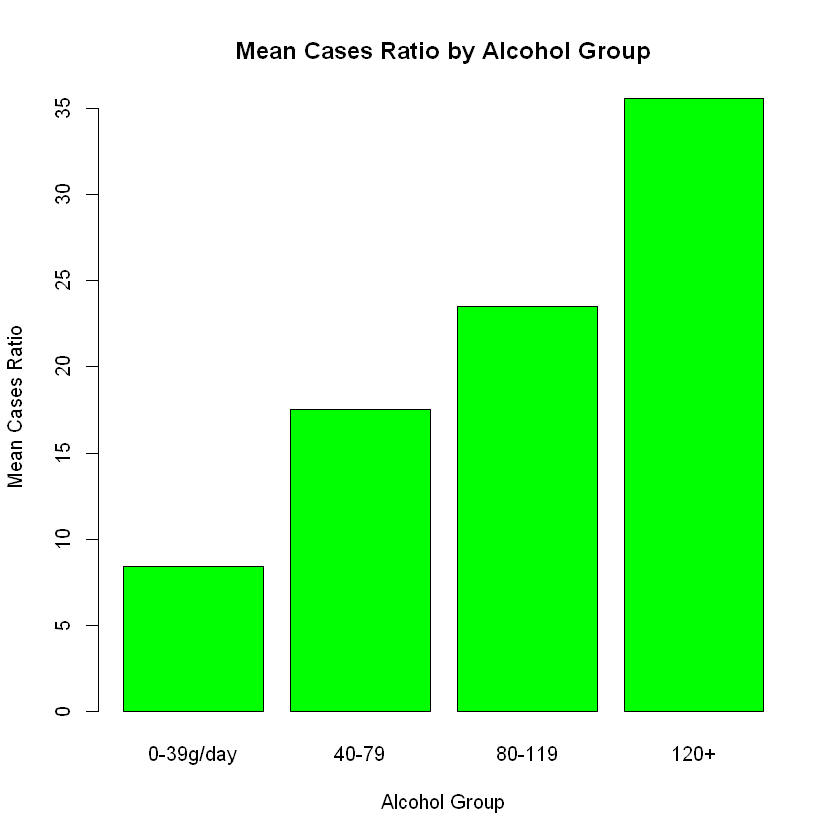

In [9]:
mean_cases_ratio_by_alcgp <- aggregate(cases_ratio ~ alcgp, data = df2, FUN = mean)

barplot(mean_cases_ratio_by_alcgp$cases_ratio, 
        names.arg = mean_cases_ratio_by_alcgp$alcgp, 
        main = "Mean Cases Ratio by Alcohol Group",
        xlab = "Alcohol Group",
        ylab = "Mean Cases Ratio",
        col = "green")

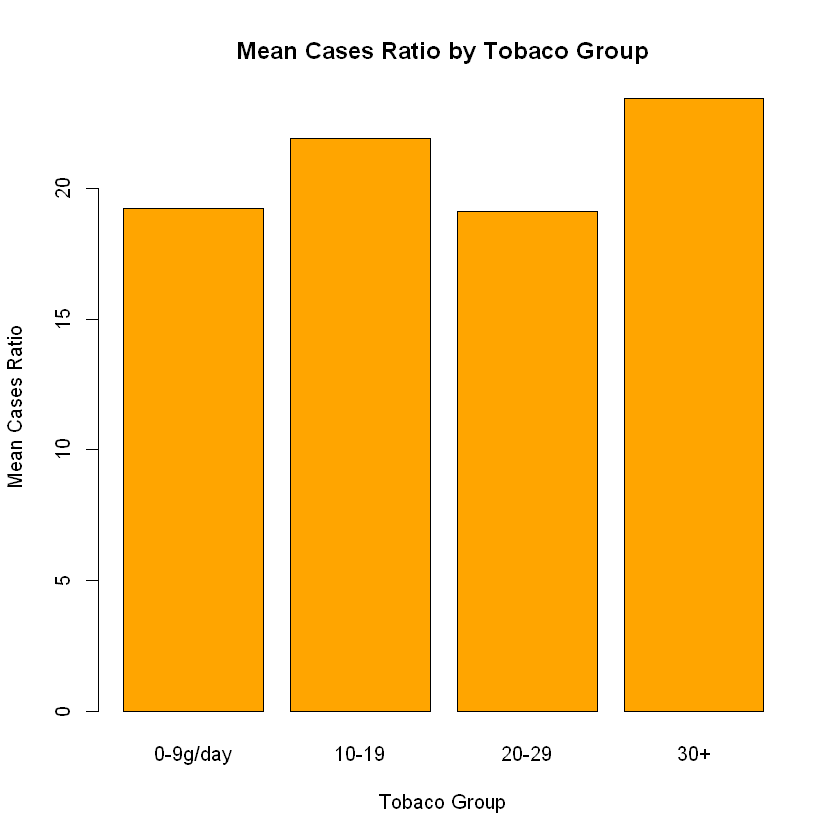

In [10]:
mean_cases_ratio_by_tobgp <- aggregate(cases_ratio ~ tobgp, data = df2, FUN = mean)

barplot(mean_cases_ratio_by_tobgp$cases_ratio, 
        names.arg = mean_cases_ratio_by_tobgp$tobgp, 
        main = "Mean Cases Ratio by Tobaco Group",
        xlab = "Tobaco Group",
        ylab = "Mean Cases Ratio",
        col = "orange")

**Abu duomenų rinkiniai išsaugomi csv formatu ir bus naudojami antroje dalyje**

In [11]:
write.csv(df, file = "esoph_df.csv", row.names = FALSE)
write.csv(df2, file = "esoph_df2.csv", row.names = FALSE)

# Papildoma dalis

**H0: stemplės susirgimų santykio vidurkis tarp 30 ir 80 amžiaus grupių yra vienodas**

**H0 atmesta, p-vertė = 0.003542**

In [22]:
age30 <- subset(data, agegp == 30 )
age80 <- subset(data, agegp == 80)

ttest_result <- t.test(age30$cases_ratio, age80$cases_ratio, conf.level = 0.95)

print(ttest_result)



	Welch Two Sample t-test

data:  age30$cases_ratio and age80$cases_ratio
t = -4.4637, df = 16.722, p-value = 0.0003542
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -43.14869 -15.42730
sample estimates:
mean of x mean of y 
 3.333333 32.621326 



**H0: stemplės susirgimų santykio vidurkis tarp 5 g/dieną tobako ir 30 g/dieną tobako grupių yra vienodas**

**H0: priimta, p-vertė = 0.512**

In [24]:
tob5 <- subset(data, tobgp == 5 )
tob30 <- subset(data, tobgp == 30)

ttest_result <- t.test(tob5$cases_ratio, tob30$cases_ratio)

print(ttest_result)


	Welch Two Sample t-test

data:  tob5$cases_ratio and tob30$cases_ratio
t = -0.66215, df = 36.971, p-value = 0.512
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -17.086028   8.669494
sample estimates:
mean of x mean of y 
 19.23113  23.43939 



**H0: stemplės susirgimų santykio vidurkis tarp 20 g/dieną alkoholio ir 120 g/dieną alkoholio grupių yra vienodas**

**H0 priimta, p-vertė = 1.991e-06**

In [18]:
alc20 <- subset(data, alcgp == 20 )
alc120 <- subset(data, alcgp == 120)

ttest_result <- t.test(alc20$cases_ratio, alc120$cases_ratio)

print(ttest_result)


	Welch Two Sample t-test

data:  alc20$cases_ratio and alc120$cases_ratio
t = -5.7593, df = 32.854, p-value = 1.991e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -36.75367 -17.56274
sample estimates:
mean of x mean of y 
 8.428585 35.586794 

